In [1]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sbs
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from matplotlib import pyplot
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow
from tensorflow import data

In [2]:
file_data = 'DS_Agua_2017_2022.csv'
path_name='data/'
arquivo = f'{path_name}{file_data}'

In [3]:
dataset = pd.read_csv(arquivo, sep =';', encoding = 'latin1', decimal='.')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45240 entries, 1 to 45240
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DT_MEDICAO_HORA         45240 non-null  object 
 1   PRECIPITACAO            45240 non-null  float64
 2   PRESSAO_ATMOSFERICA     45240 non-null  float64
 3   TEMPERATURA_DO_AR_C     45240 non-null  float64
 4   UMIDADE_RELATIVA_DO_AR  45240 non-null  float64
 5   VELOCIDADE_VENTO        45240 non-null  float64
 6   VL_MEDICAO              45240 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.8+ MB


In [5]:
#verifica se existe variáveis nulas 
dataset.isna().sum()

DT_MEDICAO_HORA           0
PRECIPITACAO              0
PRESSAO_ATMOSFERICA       0
TEMPERATURA_DO_AR_C       0
UMIDADE_RELATIVA_DO_AR    0
VELOCIDADE_VENTO          0
VL_MEDICAO                0
dtype: int64

In [6]:
dataset.head(10)

,DT_MEDICAO_HORA,PRECIPITACAO,PRESSAO_ATMOSFERICA,TEMPERATURA_DO_AR_C,UMIDADE_RELATIVA_DO_AR,VELOCIDADE_VENTO,VL_MEDICAO
1,2017-01-01 00:00:00,0.0,1009.5,25.9,75.0,1.3,5016.845991
2,2017-01-01 01:00:00,0.0,1009.6,25.7,76.0,0.9,4998.296902
3,2017-01-01 02:00:00,0.0,1009.2,25.6,76.0,1.1,5013.330096
4,2017-01-01 03:00:00,0.0,1008.4,25.9,77.0,1.7,4972.739746
5,2017-01-01 04:00:00,0.0,1008.1,23.7,85.0,1.7,4921.942265
6,2017-01-01 05:00:00,0.2,1007.5,23.7,87.0,0.4,4838.136258
7,2017-01-01 06:00:00,0.0,1007.3,24.2,88.0,0.5,4833.215005
8,2017-01-01 07:00:00,0.0,1007.3,24.2,87.0,0.7,4795.247653
9,2017-01-01 08:00:00,0.0,1007.7,24.7,85.0,1.0,4763.098501
10,2017-01-01 09:00:00,0.0,1008.5,25.1,83.0,1.2,4715.598748


In [7]:
#tratando o dataframe
n_time_steps=3
df = pd.DataFrame()
df['VL_MEDICAO']=dataset['VL_MEDICAO']

#transformação da série => janela deslizande com 1 passo de tempo
for n_step in range(1,n_time_steps+1,1):
 df['vl-'+str(n_step)]=dataset['VL_MEDICAO'].shift(n_step)  
 
df['tp-n']=dataset['TEMPERATURA_DO_AR_C']
df['pr-n']=dataset['PRESSAO_ATMOSFERICA']
df['vv-n']=dataset['VELOCIDADE_VENTO']
df['ur-n']=dataset['UMIDADE_RELATIVA_DO_AR']
df['ch-n']=dataset['PRECIPITACAO']

df.dropna(inplace=True)
df.head(15)

,VL_MEDICAO,vl-1,vl-2,vl-3,tp-n,pr-n,vv-n,ur-n,ch-n
4,4972.739746,5013.330096,4998.296902,5016.845991,25.9,1008.4,1.7,77.0,0.0
5,4921.942265,4972.739746,5013.330096,4998.296902,23.7,1008.1,1.7,85.0,0.0
6,4838.136258,4921.942265,4972.739746,5013.330096,23.7,1007.5,0.4,87.0,0.2
7,4833.215005,4838.136258,4921.942265,4972.739746,24.2,1007.3,0.5,88.0,0.0
8,4795.247653,4833.215005,4838.136258,4921.942265,24.2,1007.3,0.7,87.0,0.0
9,4763.098501,4795.247653,4833.215005,4838.136258,24.7,1007.7,1.0,85.0,0.0
10,4715.598748,4763.098501,4795.247653,4833.215005,25.1,1008.5,1.2,83.0,0.0
11,4712.059896,4715.598748,4763.098501,4795.247653,26.2,1009.0,1.5,77.0,0.0
12,4657.193811,4712.059896,4715.598748,4763.098501,28.4,1009.5,1.6,67.0,0.0
13,4683.363206,4657.193811,4712.059896,4715.598748,28.7,1010.0,1.6,68.0,0.0


In [8]:

#Do total de 45239 linhas, foram separadas 75% para treinamento e 25% para teste
nlinhas = int(np.round(dataset.shape[0] * 0.75)) # 

#nlinhas = 33929 # 75% do dataset

max_size_train_split = int(np.round(nlinhas / 5)) 
max_size__test_split = int(np.round((dataset.shape[0] - nlinhas) / 5))
size_split = 5
  
X_train = df.iloc[0:nlinhas,1: 6 + n_time_steps]
X_test = df.iloc[nlinhas:dataset.shape[0],1: 6 + n_time_steps]

y_train = df.iloc[0:nlinhas,0].values
y_test = df.iloc[nlinhas:dataset.shape[0],0].values


In [9]:
from sklearn.model_selection import TimeSeriesSplit
# Validador cruzado para séries temporais para 5 conjuntos de dados
ts_cv = TimeSeriesSplit(
    n_splits=size_split, # Number of divisions
    max_train_size=max_size_train_split,    # maximum size of each set. of training
    gap=2, # number of samples to exclude between each training and testing set
    test_size=max_size__test_split, # maximum size of each set. of test.
)
C = [ 1000, 10000,100000] # Parâmetro de regularização
gamma = [0.0000001, 0.000001, 0.00000001] # Coeficiente da função kernel  
epsilon = [0.001, 0.0001, 0.00001]
hyper_params = [{'kernel': ['rbf'],'C': C, 'gamma':gamma, 'epsilon':epsilon}]  

modelo = SVR()
grid = GridSearchCV(modelo,param_grid=hyper_params,verbose=20,n_jobs=-4,cv=ts_cv)
                   #scoring='neg_mean_absolute_percentage_error')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=TimeSeriesSplit(gap=2, max_train_size=6786, n_splits=5, test_size=2262),
             estimator=SVR(), n_jobs=-4,
             param_grid=[{'C': [1000, 10000, 100000],
                          'epsilon': [0.001, 0.0001, 1e-05],
                          'gamma': [1e-07, 1e-06, 1e-08], 'kernel': ['rbf']}],
             verbose=20)

In [10]:
print(grid.best_params_) 

{'C': 10000, 'epsilon': 0.001, 'gamma': 1e-08, 'kernel': 'rbf'}


In [11]:
print('Melhor score:', grid.best_score_)
print('Melhor Kernel:',grid.best_estimator_.kernel)
print('Melhor Gamma:',grid.best_estimator_.gamma)
print('Melhor C:',grid.best_estimator_.C) 

Melhor score: 0.6221500580024781
Melhor Kernel: rbf
Melhor Gamma: 1e-08
Melhor C: 10000


In [12]:
predict=grid.predict(X_test)
predict

array([8344.07442274, 8543.28733645, 8474.7762612 , ..., 8684.22776145,
       9029.64082738, 9051.94992737])

In [13]:
# MAPE statistics for test data
((np.mean(np.abs(y_test - predict) / (y_test)))) * 100

3.028547238579913

In [14]:
#Estimate Et for treinam and test
# For treinam data
Lt_train = grid.predict(X_train)
Yt_train = y_train
#Error Et for treinam data predicted
Et_train = Yt_train - Lt_train

# For test data
Lt_test = predict
Yt_test = y_test
#Error Et for treinam data predicted
Et_test = Yt_test - Lt_test

In [15]:
# MAPE statistics for train data
((np.mean(np.abs(y_train - Lt_train) / (y_train)))) * 100

2.5104174450936085

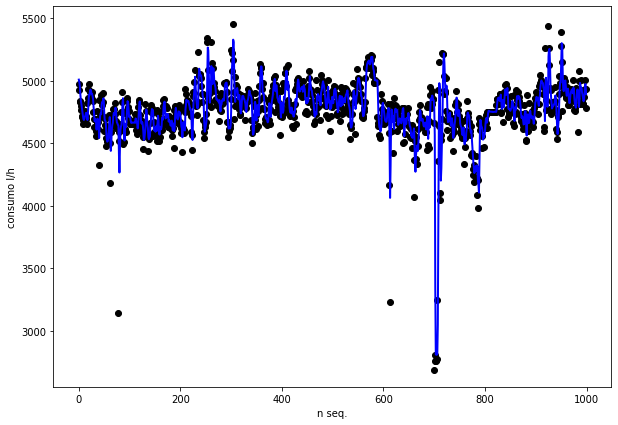

In [16]:
predict = Lt_train
y_label = y_train
#O gráfico abaixo mostra os valores reais em preto e os valores prditos em azul
npredicts=1000
pyplot.figure(figsize=(10,7)) 
pyplot.scatter(np.arange(0,y_label.shape[0],1)[0:npredicts],np.array(y_label)[0:npredicts], color = 'black')
pyplot.plot(np.arange(0,predict.shape[0],1)[0:npredicts], np.array(predict)[0:npredicts], color = 'blue', linewidth=2)
pyplot.xlabel('n seq.')
pyplot.ylabel('consumo l/h')
pyplot.show()

In [17]:
#create  dataframe of Et train data
df_Et = pd.DataFrame(Et_train, columns=['VL_Et'])
for n_step in range(1,n_time_steps+1,1):
    df_Et['vl-'+str(n_step)]=df_Et['VL_Et'].shift(n_step)  

#drop rows with null values
df_Et.dropna(inplace=True)

Nt_train = df_Et['VL_Et']

df_Et.drop(['VL_Et'],axis=1, inplace=True)

Xet_train = df_Et
yet_train = Nt_train

In [18]:
def treinar_LSTM(X_train, y_train, N_Nos_Layer1, N_Nos_Layer2,N_Nos_Layer3, EPOCAS , batch_size = 4096):
  train_feature = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
  train_label = np.array(y_train).reshape((y_train.shape[0], 1, 1))

  # Armazena a hora de início da execução do Treinamento
  # batch_size = 4096 # Tamanho de cada lote de processamento usando para o modelo abstrair os padrões
  # EPOCAS é o número de vezes que o conjunto de lotes irá ser processado pelo modelo na fase de treinamento.

  train_data = data.Dataset.from_tensor_slices((train_feature, train_label))
  train_data = train_data.repeat().batch(batch_size, drop_remainder=True)

  
  model = keras.Sequential()
  model.add(layers.LSTM(N_Nos_Layer1, batch_input_shape=(batch_size, train_feature.shape[1], train_feature.shape[2]),  return_sequences=True, activation='sigmoid'))  
  model.add(layers.LSTM(N_Nos_Layer2, batch_input_shape=(N_Nos_Layer1, train_feature.shape[1], train_feature.shape[2]), return_sequences=True, activation='sigmoid'))  
  model.add(layers.LSTM(N_Nos_Layer3, batch_input_shape=(N_Nos_Layer1, train_feature.shape[1], train_feature.shape[2]), return_sequences=True, activation='relu'))  
  #model.add(layers.Dense(N_Nos_Layer2, activation="relu"))
  #model.add(layers.Dense(N_Nos_Layer3, activation="relu"))
  model.add(layers.Dense(1))

  #mean_squared_error
  model.compile(loss='mean_absolute_percentage_error', optimizer='adam', metrics=['mape'])
  model.summary()
  
  steps_per_epoch = len(train_feature) // batch_size 
  history = model.fit(train_data, epochs=EPOCAS, steps_per_epoch = steps_per_epoch) 

  #--------------------------------------------------------------------------------
  val_feature = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
  val_label = np.array(y_train).reshape((y_train.shape[0], 1, 1))


  test_data = data.Dataset.from_tensor_slices((val_feature, val_label))
  test_data = test_data.repeat().batch(batch_size, drop_remainder=True)

  predict = model.predict(test_data, steps=1)
  #predict = model.predict(train_data, steps=1)

  val_label=val_label[0:len(predict)]

  predict = np.array(predict).reshape(batch_size,1)
  val_label = np.array(val_label).reshape(batch_size,1)

  #Calcular o MAPE (Erro médio percentual absoluto)
  MAPE = ((np.mean(np.abs(val_label -predict) / (val_label)))) * 100
#--------------------------------------------------------------------------------

#  val_feature = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
#  val_label = np.array(y_train).reshape((y_train.shape[0], 1, 1))
#
#
#  train_data = data.Dataset.from_tensor_slices((val_feature, val_label))
#  train_data = train_data.repeat().batch(batch_size, drop_remainder=True)
#
#  predict = model.predict(train_data, steps=1)
#
#  val_label=val_label[0:len(predict)]
#
#  predict = np.array(predict).reshape(batch_size,1)
#  val_label = np.array(val_label).reshape(batch_size,1)
#
#  val_label=val_label[0:len(predict)]
#
  #Validação dos resultados

  #Calcular o MAPE (Erro médio percentual absoluto)
  #MAPE = ((np.mean(np.abs(val_label -predict) / (val_label)))) * 100 
  
  return MAPE, model

In [19]:
def previsao_LSTM(X_test, y_test, model, batch_size):
  val_feature = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))
  val_label = np.array(y_test).reshape((y_test.shape[0], 1, 1))


  test_data = data.Dataset.from_tensor_slices((val_feature, val_label))
  test_data = test_data.repeat().batch(batch_size, drop_remainder=True)

  predict = model.predict(test_data, steps=1)
  #predict = model.predict(train_data, steps=1)

  val_label=val_label[0:len(predict)]

  predict = np.array(predict).reshape(batch_size,1)
  val_label = np.array(val_label).reshape(batch_size,1)

  #Calcular o MAPE (Erro médio percentual absoluto)
  MAPE = ((np.mean(np.abs(val_label -predict) / (val_label)))) * 100
  
  return MAPE, predict, val_label

In [20]:
class BestModel:
  #Classe para armazenar os melhores hiperparâmetros
  def __init__(self,  N_Nos_Layer1, N_Nos_Layer2, N_Nos_Layer3, MAPE, model = 0):
    self.N_Nos_Layer1 = N_Nos_Layer1
    self.N_Nos_Layer2 = N_Nos_Layer2
    self.N_Nos_Layer3 = N_Nos_Layer3
    self.MAPE = MAPE
    self.model = model
  
  def setIndex(self, N_Nos_Layer1, N_Nos_Layer2, N_Nos_Layer3, MAPE, model):
    self.N_Nos_Layer1 = N_Nos_Layer1
    self.N_Nos_Layer2 = N_Nos_Layer2
    self.N_Nos_Layer3 = N_Nos_Layer3
    self.MAPE = MAPE
    self.model = model
        
  def show(self):
    print(" LSTM (", self.N_Nos_Layer1, ",", self.N_Nos_Layer2, ",", self.N_Nos_Layer3, ") MAPE ", self.MAPE)

In [24]:
       
# Efetuar o processo de Calibração da LSTM, variando os hiperparâmetros
#N_Nos_Layer1 = 5
#N_Nos_Layer2 = 15
EPOCAS = 200
batch_size = 4096
MAPE = 100
bestModel = BestModel(32, 32, 32, MAPE)
arquivo='Result_LSTM_Model.csv'

#n_valores_passado = 10
##criar_arquivo_resultado(arquivo)
#Laço para variação da Camada Oculta 1
for N_Nos_Layer1 in range (100,90,-8):
  #Laço para variação da Camada Oculta 2
  for N_Nos_Layer2 in range (96,90,-8):
    for N_Nos_Layer3 in range (90,86,-8):
      #Chama a função de treinamento da LSTM com os hiperparâmetros selecionados para cada iteração
      MAPE, model = treinar_LSTM(Xet_train, yet_train, N_Nos_Layer1, N_Nos_Layer2, N_Nos_Layer3, EPOCAS, batch_size)
      #armazena o melhor modelo, com o menor MAPE
      if(bestModel.MAPE > MAPE):
        bestModel.setIndex(N_Nos_Layer1, N_Nos_Layer2, N_Nos_Layer3, MAPE, model)
    

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (4096, 1, 100)            41600     
                                                                 
 lstm_4 (LSTM)               (4096, 1, 96)             75648     
                                                                 
 lstm_5 (LSTM)               (4096, 1, 90)             67320     
                                                                 
 dense_1 (Dense)             (4096, 1, 1)              91        
                                                                 
Total params: 184,659
Trainable params: 184,659
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
8/8 [==============================] - 8s 174ms/step - loss: 100.0691 - mape: 100.0691
Epoch 2/200
8/8 [==============================] - 1s 165ms/step - loss: 100.1104

In [25]:
bestModel.show()

 LSTM ( 92 , 96 , 82 ) MAPE  -3.4095453934793194


In [26]:
MAPE, predict, y_label = previsao_LSTM(Xet_train, yet_train, bestModel.model, batch_size)
print("MAPE=", MAPE)

MAPE= -3.4095453934793194


In [ ]:
#MAPE to Et predicted on MLP Model
#predict=bestModel.model.predict(X_train, y_train)  
#((np.mean(np.abs(y_train - predict) / (y_train)))) * 100

In [27]:
# Recomposition of Nt + Lt form train data
Lt_train2 = Lt_train[n_time_steps:len(Lt_train)]
Yt_train2 = Yt_train[n_time_steps:len(Yt_train)]
Yt_train_predicted = predict + Lt_train2
((np.mean(np.abs(Yt_train2 - Yt_train_predicted) / (Yt_train2)))) * 100

2.5105138589976517

In [28]:
# For test data
#Lt_test = predict
#Yt_test = y_test
#Et_test = Yt_test - Lt_test


#create  dataframe of Et value
df_Et = pd.DataFrame(Et_test, columns=['VL_Et'])

for n_step in range(1,n_time_steps+1,1):
    df_Et['vl-'+str(n_step)]=df_Et['VL_Et'].shift(n_step)  

#drop rows with null values
df_Et.dropna(inplace=True)

Nt_test = df_Et['VL_Et']

df_Et.drop(['VL_Et'],axis=1, inplace=True)

Xet_test = df_Et
yet_test = Nt_test

In [42]:
#MAPE to Et predicted on MLP Model

batch_size=1
MAPE, predict, y_label = previsao_LSTM(Xet_test, yet_test, bestModel.model, batch_size)
#predict=bestModel.model.predict(Xet_test, y_test)  
#MAPE_Nt_test = ((np.mean(np.abs(y_label - predict) / (y_label)))) * 100

# Recomposition of Nt + Lt form test data
Lt_test2 = Lt_test[n_time_steps:len(Lt_test)]
Yt_test2 = Yt_test[n_time_steps:len(Yt_test)]
Yt_test_predicted = predict + Lt_test2
MAPE = ((np.mean(np.abs(Yt_test2 - Yt_test_predicted) / (Yt_test2)))) * 100
print('MAPE',MAPE)

predict = Yt_test_predicted
y_label = Yt_test2

MAPE 3.0288147155041707


In [46]:
predict=predict[0]

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
y_test = y_label
MSE = mean_squared_error(y_label, predict)  
MSE

208030.1531573345

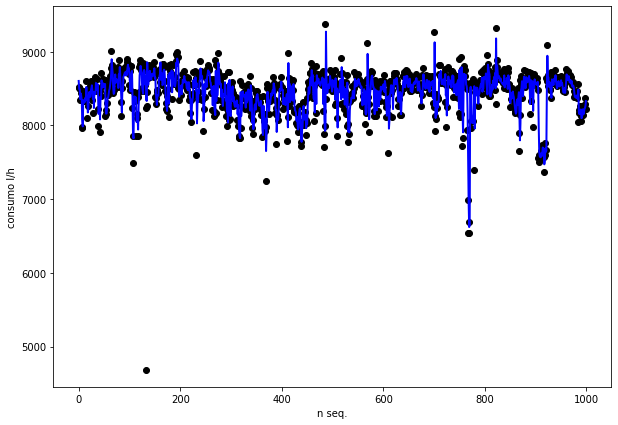

In [53]:

#O gráfico abaixo mostra os valores reais em preto e os valores prditos em azul
npredicts=1000
pyplot.figure(figsize=(10,7)) 
pyplot.scatter(np.arange(0,y_label.shape[0],1)[0:npredicts],np.array(y_label)[0:npredicts], color = 'black')
pyplot.plot(np.arange(0,predict.shape[0],1)[0:npredicts], np.array(predict)[0:npredicts], color = 'blue', linewidth=2)
pyplot.xlabel('n seq.')
pyplot.ylabel('consumo l/h')
pyplot.show()

In [54]:
 # Square Root of Mean Error - RMSE
RMSE = np.sqrt(mean_squared_error(y_test, predict))  

# Mean Absolute Distance or Mean Absolute Error - MAE
MAE= median_absolute_error(y_pred=predict, y_true = y_test)  

#Calculate the MAPE (Mean Absolute Percentage Error)
MAPE = ((np.mean(np.abs(y_test -predict) / (y_test)))) * 100   
MAPE

3.0288147155041707